# Lane Detection Experiment 2

Created on Wed Mar  3 17:10:35 2021

@author: Kevin Machado Gamboa

References:
    1. https://gist.github.com/pknowledge/8933224beea63ffd818f72da76b18f3e
    2. https://www.youtube.com/watch?v=yvfI4p6Wyvk
 ## ibraries & Functions implemented

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

#  Functions Implemented

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

## Loading Images

In [2]:
im_folder = '../lane_dataset'
images = [cv.imread(os.path.join(im_folder, image)) for image in os.listdir(im_folder)]
im = images[:6]
#or_size = (im.shape[0], im.shape[1])

## Lane Detection Main Code

In [3]:
image_with_lines = []

for i in range(6):
    image = im[i]
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    #print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width/2, height/2),
        (width, height)
    ]
    gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    canny_image = cv.Canny(gray_image, 100, 200)
    cropped_image = region_of_interest(canny_image,
                    np.array([region_of_interest_vertices], np.int32),)
    lines = cv.HoughLinesP(cropped_image,
                            rho=6,
                            theta=np.pi/180,
                            threshold=160,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=25)
    
    image_with_lines.append(drow_the_lines(image, lines))

## Results

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
axes[0,0].set_title('Original')
for i in range(6):
    axes[i,0].imshow(im[i], aspect='auto')
    axes[i, 1].imshow(image_with_lines[i], aspect='auto')
axes[0, 1].set_title('Prediction')
plt.show()

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
axes[0,0].set_title('Original')
for i in range(6):
    axes[i,0].imshow(im[i], aspect='auto')
    axes[i, 1].imshow(image_with_lines[i], aspect='auto')
axes[0, 1].set_title('Prediction')
plt.show()

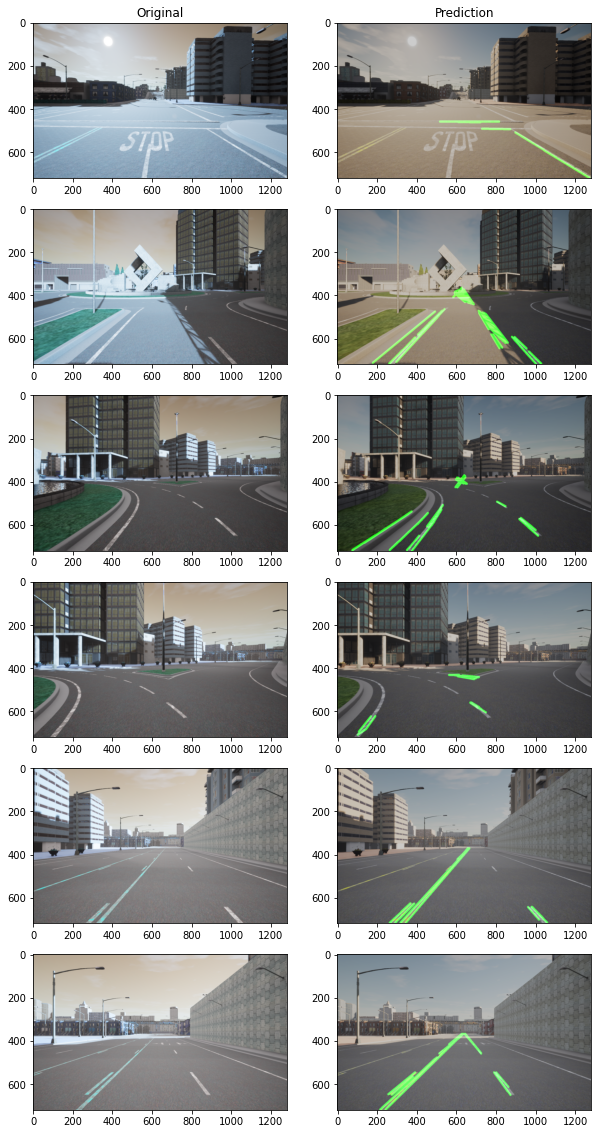

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
axes[0,0].set_title('Original')
for i in range(6):
    axes[i,0].imshow(im[i], aspect='auto')
    axes[i, 1].imshow(image_with_lines[i], aspect='auto')
axes[0, 1].set_title('Prediction')
plt.show()